In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from networks.networks import ExampleNet
from solver import Solver
import data_visualization
import data_loader

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified


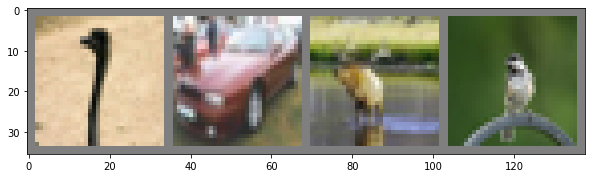

      bird      car     deer     bird


In [4]:
batch_size = 64

trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=4, subset_indices=[i for i in range(100)])

#trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=batch_size, subset_indices=[i for i in range(100)])
testloader = data_loader.get_CIFAR10_testset_loader(batch_size=batch_size)
classes = data_loader.get_CIFAR10_classes()

data_visualization.show_samples(trainloader, classes)

In [5]:
net = ExampleNet()
#net = models.vgg16(pretrained=True)

#solver = Solver(net, trainloader, testloader, optim = 'adam', num_epochs=5)
solver = Solver(net, trainloader, validationloader=testloader, optim = 'adam', num_epochs=50, print_every=4)

In [6]:
solver.train()

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    1,         4]    2.28071725 |        0.25000000
[    1,         8]    2.28531158 |        0.12500000
[    1,        12]    2.27990425 |        0.18750000
[    1,        16]    2.31879073 |        0.00000000
[    1,        20]    2.33491844 |        0.06250000
[    1,        24]    2.26698214 |        0.25000000
----------------------------------------------------
[    1,  finished]     accuracy: |        0.10000000 


[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    2,         4]    2.26454526 |        0.18750000
[    2,         8]    2.25933200 |        0.18750000
[    2,        12]    2.28275621 |        0.12500000
[    2,        16]    2.25479954 |        0.18750000
[    2,        20]    2.26322609 |        0.12500000
[    2,        24]    2.22263199 |        0.18750000
-------------------------------------------

----------------------------------------------------
[   16,  finished]     accuracy: |        0.21710000 


[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[   17,         4]    0.85236007 |        0.75000000
[   17,         8]    1.16278283 |        0.62500000
[   17,        12]    0.91599922 |        0.62500000
[   17,        16]    0.89111334 |        0.75000000
[   17,        20]    1.01838785 |        0.56250000
[   17,        24]    0.68510169 |        0.81250000
----------------------------------------------------
[   17,  finished]     accuracy: |        0.22000000 


[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[   18,         4]    0.45158022 |        0.93750000
[   18,         8]    0.89789806 |        0.68750000
[   18,        12]    1.18761013 |        0.62500000
[   18,        16]    1.26556060 |        0.43750000
[   18,        20]    0.82056725 |      

[   32,         4]    0.03589510 |        1.00000000
[   32,         8]    0.05323412 |        1.00000000
[   32,        12]    0.02482099 |        1.00000000
[   32,        16]    0.06786420 |        1.00000000
[   32,        20]    0.07212040 |        1.00000000
[   32,        24]    0.04755342 |        1.00000000
----------------------------------------------------
[   32,  finished]     accuracy: |        0.21860000 


[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[   33,         4]    0.01873749 |        1.00000000
[   33,         8]    0.01244236 |        1.00000000
[   33,        12]    0.22749542 |        0.87500000
[   33,        16]    0.02037631 |        1.00000000
[   33,        20]    0.40285353 |        0.81250000
[   33,        24]    0.19484162 |        0.87500000
----------------------------------------------------
[   33,  finished]     accuracy: |        0.21050000 


[epoch, iteration] training loss | train

----------------------------------------------------
[   47,  finished]     accuracy: |        0.20810000 


[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[   48,         4]    0.00101376 |        1.00000000
[   48,         8]    0.02036870 |        1.00000000
[   48,        12]    0.00114703 |        1.00000000
[   48,        16]    0.00000983 |        1.00000000
[   48,        20]    0.06905687 |        1.00000000
[   48,        24]    0.25365704 |        0.93750000
----------------------------------------------------
[   48,  finished]     accuracy: |        0.20200000 


[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[   49,         4]    0.20147949 |        0.93750000
[   49,         8]    0.26633692 |        0.93750000
[   49,        12]    0.12950504 |        0.93750000
[   49,        16]    0.00017917 |        1.00000000
[   49,        20]    0.00163603 |      

In [7]:
PATH = './cifar_net.pth'
solver.save_model(PATH)

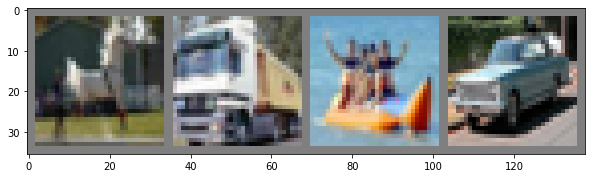

      Real:    horse    truck     ship      car
 Predicted:    horse    truck     ship      car


In [8]:
solver.predict_samples(classes)

In [9]:
solver.print_class_accuracies(classes)

Accuracy of plane :  7 %
Accuracy of   car : 25 %
Accuracy of  bird : 21 %
Accuracy of   cat : 23 %
Accuracy of  deer : 25 %
Accuracy of   dog :  5 %
Accuracy of  frog : 15 %
Accuracy of horse : 28 %
Accuracy of  ship : 17 %
Accuracy of truck : 41 %


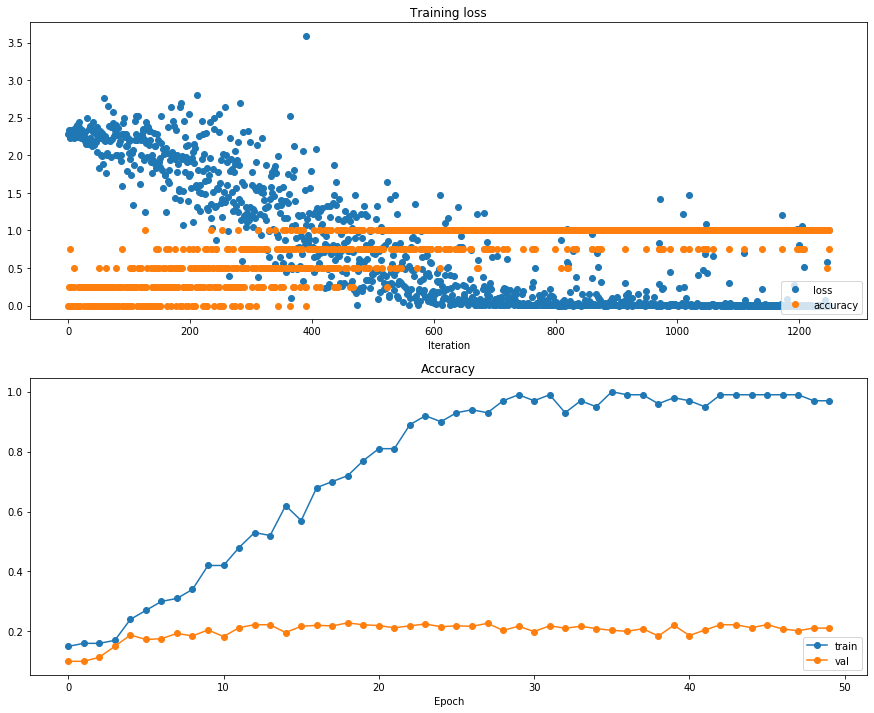

In [10]:
solver.print_plots()